# Importing Important Libraris

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There are no Null values - Dataset is clean

# Checking for Outlier

In [5]:
from scipy.stats import zscore

df['tip_zscore'] = zscore(df['tip'])
print(df)

     total_bill   tip     sex smoker   day    time  size  tip_zscore
0         16.99  1.01  Female     No   Sun  Dinner     2   -1.439947
1         10.34  1.66    Male     No   Sun  Dinner     3   -0.969205
2         21.01  3.50    Male     No   Sun  Dinner     3    0.363356
3         23.68  3.31    Male     No   Sun  Dinner     2    0.225754
4         24.59  3.61  Female     No   Sun  Dinner     4    0.443020
..          ...   ...     ...    ...   ...     ...   ...         ...
239       29.03  5.92    Male     No   Sat  Dinner     3    2.115963
240       27.18  2.00  Female    Yes   Sat  Dinner     2   -0.722971
241       22.67  2.00    Male    Yes   Sat  Dinner     2   -0.722971
242       17.82  1.75    Male     No   Sat  Dinner     2   -0.904026
243       18.78  3.00  Female     No  Thur  Dinner     2    0.001247

[244 rows x 8 columns]


In [6]:
outliers = df[(df['tip_zscore'] > 3) | (df['tip_zscore'] < -3)]
print('Outliers:\n', outliers)

Outliers:
      total_bill    tip   sex smoker  day    time  size  tip_zscore
23        39.42   7.58  Male     No  Sat  Dinner     4    3.318164
170       50.81  10.00  Male    Yes  Sat  Dinner     3    5.070772
212       48.33   9.00  Male     No  Sat  Dinner     4    4.346554


In [7]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df['tip'] = scaler.fit_transform(df[['tip']])

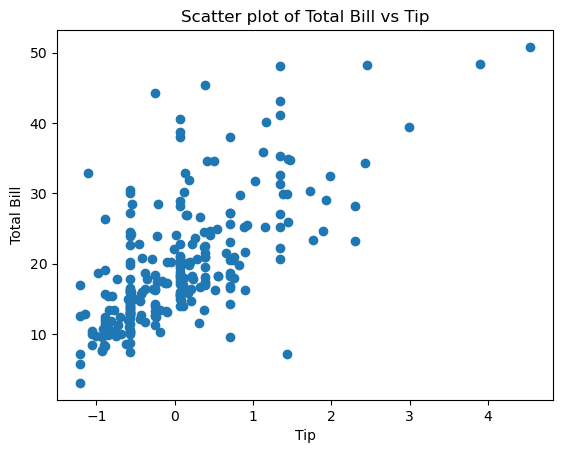

In [8]:
plt.scatter(df['tip'], df['total_bill'])
plt.ylabel('Total Bill')
plt.xlabel('Tip')
plt.title('Scatter plot of Total Bill vs Tip')
plt.show()

# Spliting Data into Test and Train Data

In [9]:
X = df[['tip']]
y = df[['total_bill']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Visualization

Text(0, 0.5, 'Total Bill')

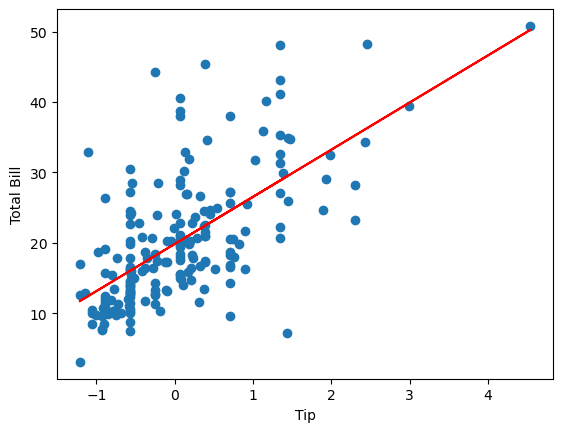

In [12]:
plt.scatter(X_train, y_train)
plt.plot(X_train,model.predict(X_train), color= "Red")
plt.xlabel("Tip")
plt.ylabel("Total Bill")

# Model Evaluation

In [13]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 21.014042524624205


In [14]:
#R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.6410241739215916


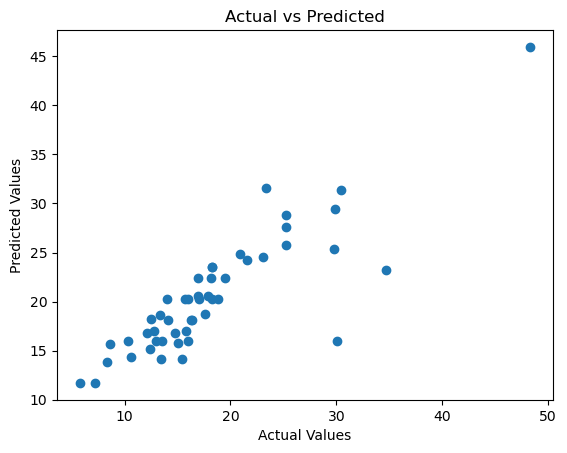

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()